In [85]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from libs.lib import get_file_dir

In [5]:
df = pd.read_csv(get_file_dir('else','joined.csv'))

In [6]:
df.head(3)

,region,yr,life_waste,life_waste_per_pop,pop,total_recycle,total_waste,recycle_ratio,income_indivisual,corp_activated,corp_recycled_waste,corp_sales_amount,corp_total_sales,total_amount_daily,total_recycled_daily,total_cremation
0,강원도,2011,2208.5,26.3,1528790,1183.5,2208.5,53.588408,13124,606,5982600,3027476,75896948,14300.1,12744.8,406.0
1,경기도,2011,10798.2,31.3,11801232,6507.8,10798.2,60.267452,15041,3447,14335230,6222895,1719769898,828859.8,123140.6,3123.3
2,경상남도,2011,3274.6,15.9,3291435,1664.2,3274.6,50.821474,14423,1909,3233993,1725141,424170153,288642.5,172667.3,963.6


In [7]:
df.tail(3)

,region,yr,life_waste,life_waste_per_pop,pop,total_recycle,total_waste,recycle_ratio,income_indivisual,corp_activated,corp_recycled_waste,corp_sales_amount,corp_total_sales,total_amount_daily,total_recycled_daily,total_cremation
117,울산광역시,2018,1550.2,6.5,1164489,812.8,1550.2,52.431944,21655,258,872692,377686,113076609,14192.3,11023.8,491.2
118,인천광역시,2018,2448.0,11.7,2950771,1645.1,2707.4,60.763094,18659,196,892295,879968,228136549,26880.4,22355.3,773.8
119,제주특별자치도,2018,1313.9,4.1,658167,772.0,1313.9,58.756374,18456,48,75019,45647,18556919,4847.2,4122.1,332.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                120 non-null    object 
 1   yr                    120 non-null    int64  
 2   life_waste            120 non-null    float64
 3   life_waste_per_pop    120 non-null    float64
 4   pop                   120 non-null    int64  
 5   total_recycle         120 non-null    float64
 6   total_waste           120 non-null    float64
 7   recycle_ratio         120 non-null    float64
 8   income_indivisual     120 non-null    int64  
 9   corp_activated        120 non-null    int64  
 10  corp_recycled_waste   120 non-null    int64  
 11  corp_sales_amount     120 non-null    int64  
 12  corp_total_sales      120 non-null    int64  
 13  total_amount_daily    120 non-null    float64
 14  total_recycled_daily  120 non-null    float64
 15  total_cremation       1

In [39]:
desc = df.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
yr,120.0,2.014500e+03,2.300895e+00,2011.000000,2.012750e+03,2.014500e+03,2.016250e+03,2.018000e+03
life_waste,120.0,3.269109e+03,2.865895e+03,764.700000,1.624200e+03,2.322350e+03,3.189175e+03,1.240610e+04
life_waste_per_pop,120.0,1.483833e+01,8.608089e+00,2.700000,6.275000e+00,1.320000e+01,2.200000e+01,3.290000e+01
pop,120.0,3.278175e+06,3.250214e+06,571468.000000,1.528064e+06,2.077406e+06,3.311914e+06,1.289044e+07
total_recycle,120.0,1.976363e+03,1.828587e+03,410.000000,9.764000e+02,1.283450e+03,1.844150e+03,7.530700e+03
total_waste,120.0,3.271271e+03,2.865369e+03,764.700000,1.624200e+03,2.322350e+03,3.189175e+03,1.240610e+04
recycle_ratio,120.0,5.926295e+01,8.072038e+00,44.142926,5.357757e+01,5.831765e+01,6.357026e+01,8.550154e+01
income_indivisual,120.0,1.692355e+04,2.212364e+03,13124.000000,1.508650e+04,1.690450e+04,1.844250e+04,2.332300e+04
corp_activated,120.0,5.809000e+02,6.241634e+02,10.000000,1.817500e+02,3.715000e+02,7.305000e+02,3.457000e+03
corp_recycled_waste,120.0,2.375837e+06,2.351868e+06,15156.000000,4.658842e+05,1.796543e+06,3.500977e+06,1.433523e+07


In [13]:
corr_table = df.corr()
corr_table

,yr,life_waste,life_waste_per_pop,pop,total_recycle,total_waste,recycle_ratio,income_indivisual,corp_activated,corp_recycled_waste,corp_sales_amount,corp_total_sales,total_amount_daily,total_recycled_daily,total_cremation
yr,1.000000,0.054393,0.078279,0.006779,0.070076,0.055560,0.107385,0.721171,-0.314055,-0.241769,-0.026068,-0.148995,-0.003190,0.019369,0.048506
life_waste,0.054393,1.000000,0.738239,0.990508,0.989728,0.999966,0.164242,0.329265,0.384892,0.254968,0.215307,0.469515,-0.008173,-0.009052,0.966619
life_waste_per_pop,0.078279,0.738239,1.000000,0.689914,0.698783,0.738097,-0.131192,0.090493,0.475757,0.559768,0.501829,0.486126,0.064167,0.054769,0.711907
pop,0.006779,0.990508,0.689914,1.000000,0.983549,0.990614,0.197370,0.300297,0.387767,0.237576,0.198683,0.471162,-0.002631,-0.006771,0.963354
total_recycle,0.070076,0.989728,0.698783,0.983549,1.000000,0.989772,0.288372,0.366762,0.301911,0.167551,0.128400,0.383719,0.022308,0.025407,0.933146
total_waste,0.055560,0.999966,0.738097,0.990614,0.989772,1.000000,0.164413,0.329922,0.384494,0.254535,0.215007,0.469398,-0.008389,-0.009229,0.966750
recycle_ratio,0.107385,0.164242,-0.131192,0.197370,0.288372,0.164413,1.000000,0.239991,-0.334890,-0.436248,-0.450194,-0.308850,0.232299,0.254245,0.031083
income_indivisual,0.721171,0.329265,0.090493,0.300297,0.366762,0.329922,0.239991,1.000000,-0.335369,-0.374929,-0.180728,-0.165721,-0.081718,-0.048846,0.292625
corp_activated,-0.314055,0.384892,0.475757,0.387767,0.301911,0.384494,-0.334890,-0.335369,1.000000,0.864896,0.676037,0.849741,0.027929,-0.018443,0.482183
corp_recycled_waste,-0.241769,0.254968,0.559768,0.237576,0.167551,0.254535,-0.436248,-0.374929,0.864896,1.000000,0.819450,0.807460,0.050263,0.004253,0.347284


<AxesSubplot:>

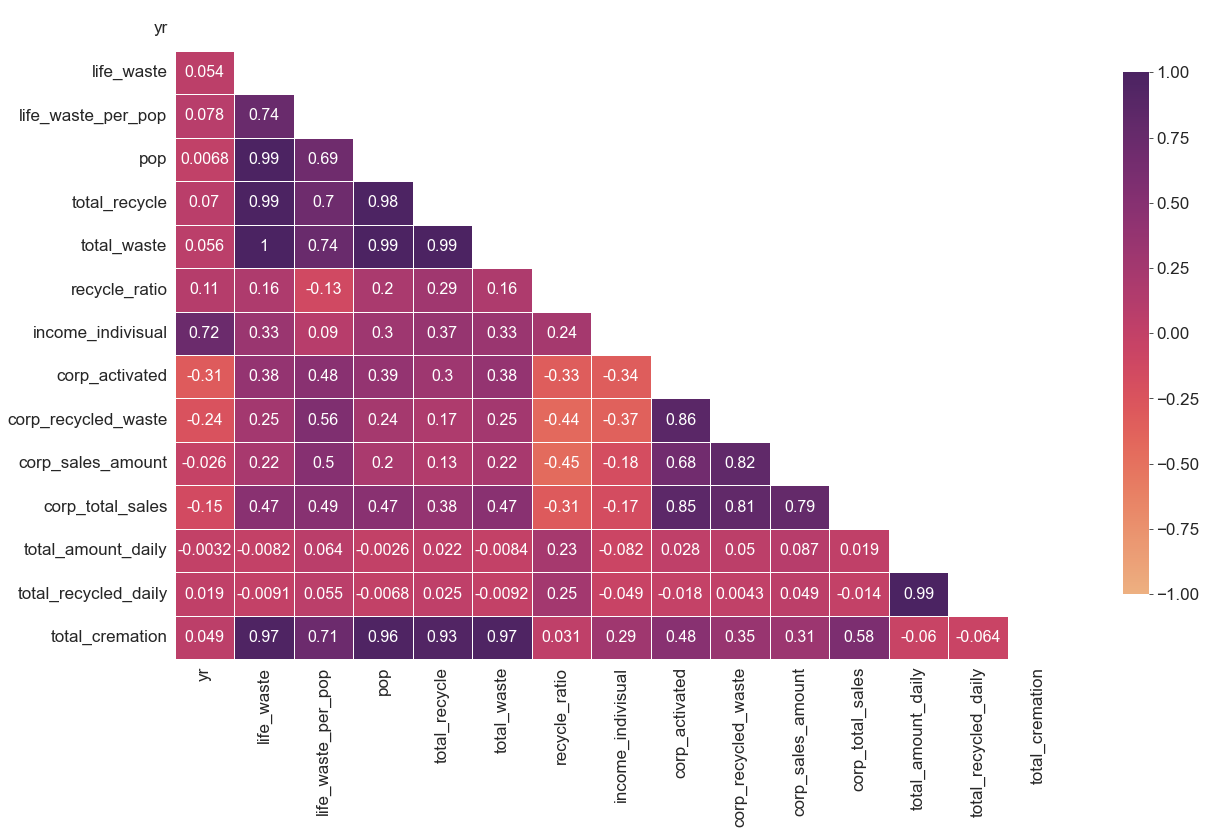

In [71]:
# draw corr heatmap
fig,ax = plt.subplots(1,1,figsize=(20,12))

zero_mask = np.zeros_like(corr_table,dtype=np.bool8)
zero_mask[np.triu_indices_from(zero_mask)] = True

cmap = sns.color_palette("flare", as_cmap=True)
options = {
    'data':corr_table,
    'cmap':cmap,
    'annot':True,
    'annot_kws':{'size':16},
    'mask':zero_mask,
    'linewidths':1,
    'cbar_kws':{'shrink':0.8},
    'vmin':-1,
    'vmax':1
}
plt.rcParams['figure.facecolor'] = (0,0,0)
plt.rcParams['font.size'] = 17
sns.set_style('white')
sns.heatmap(**options)

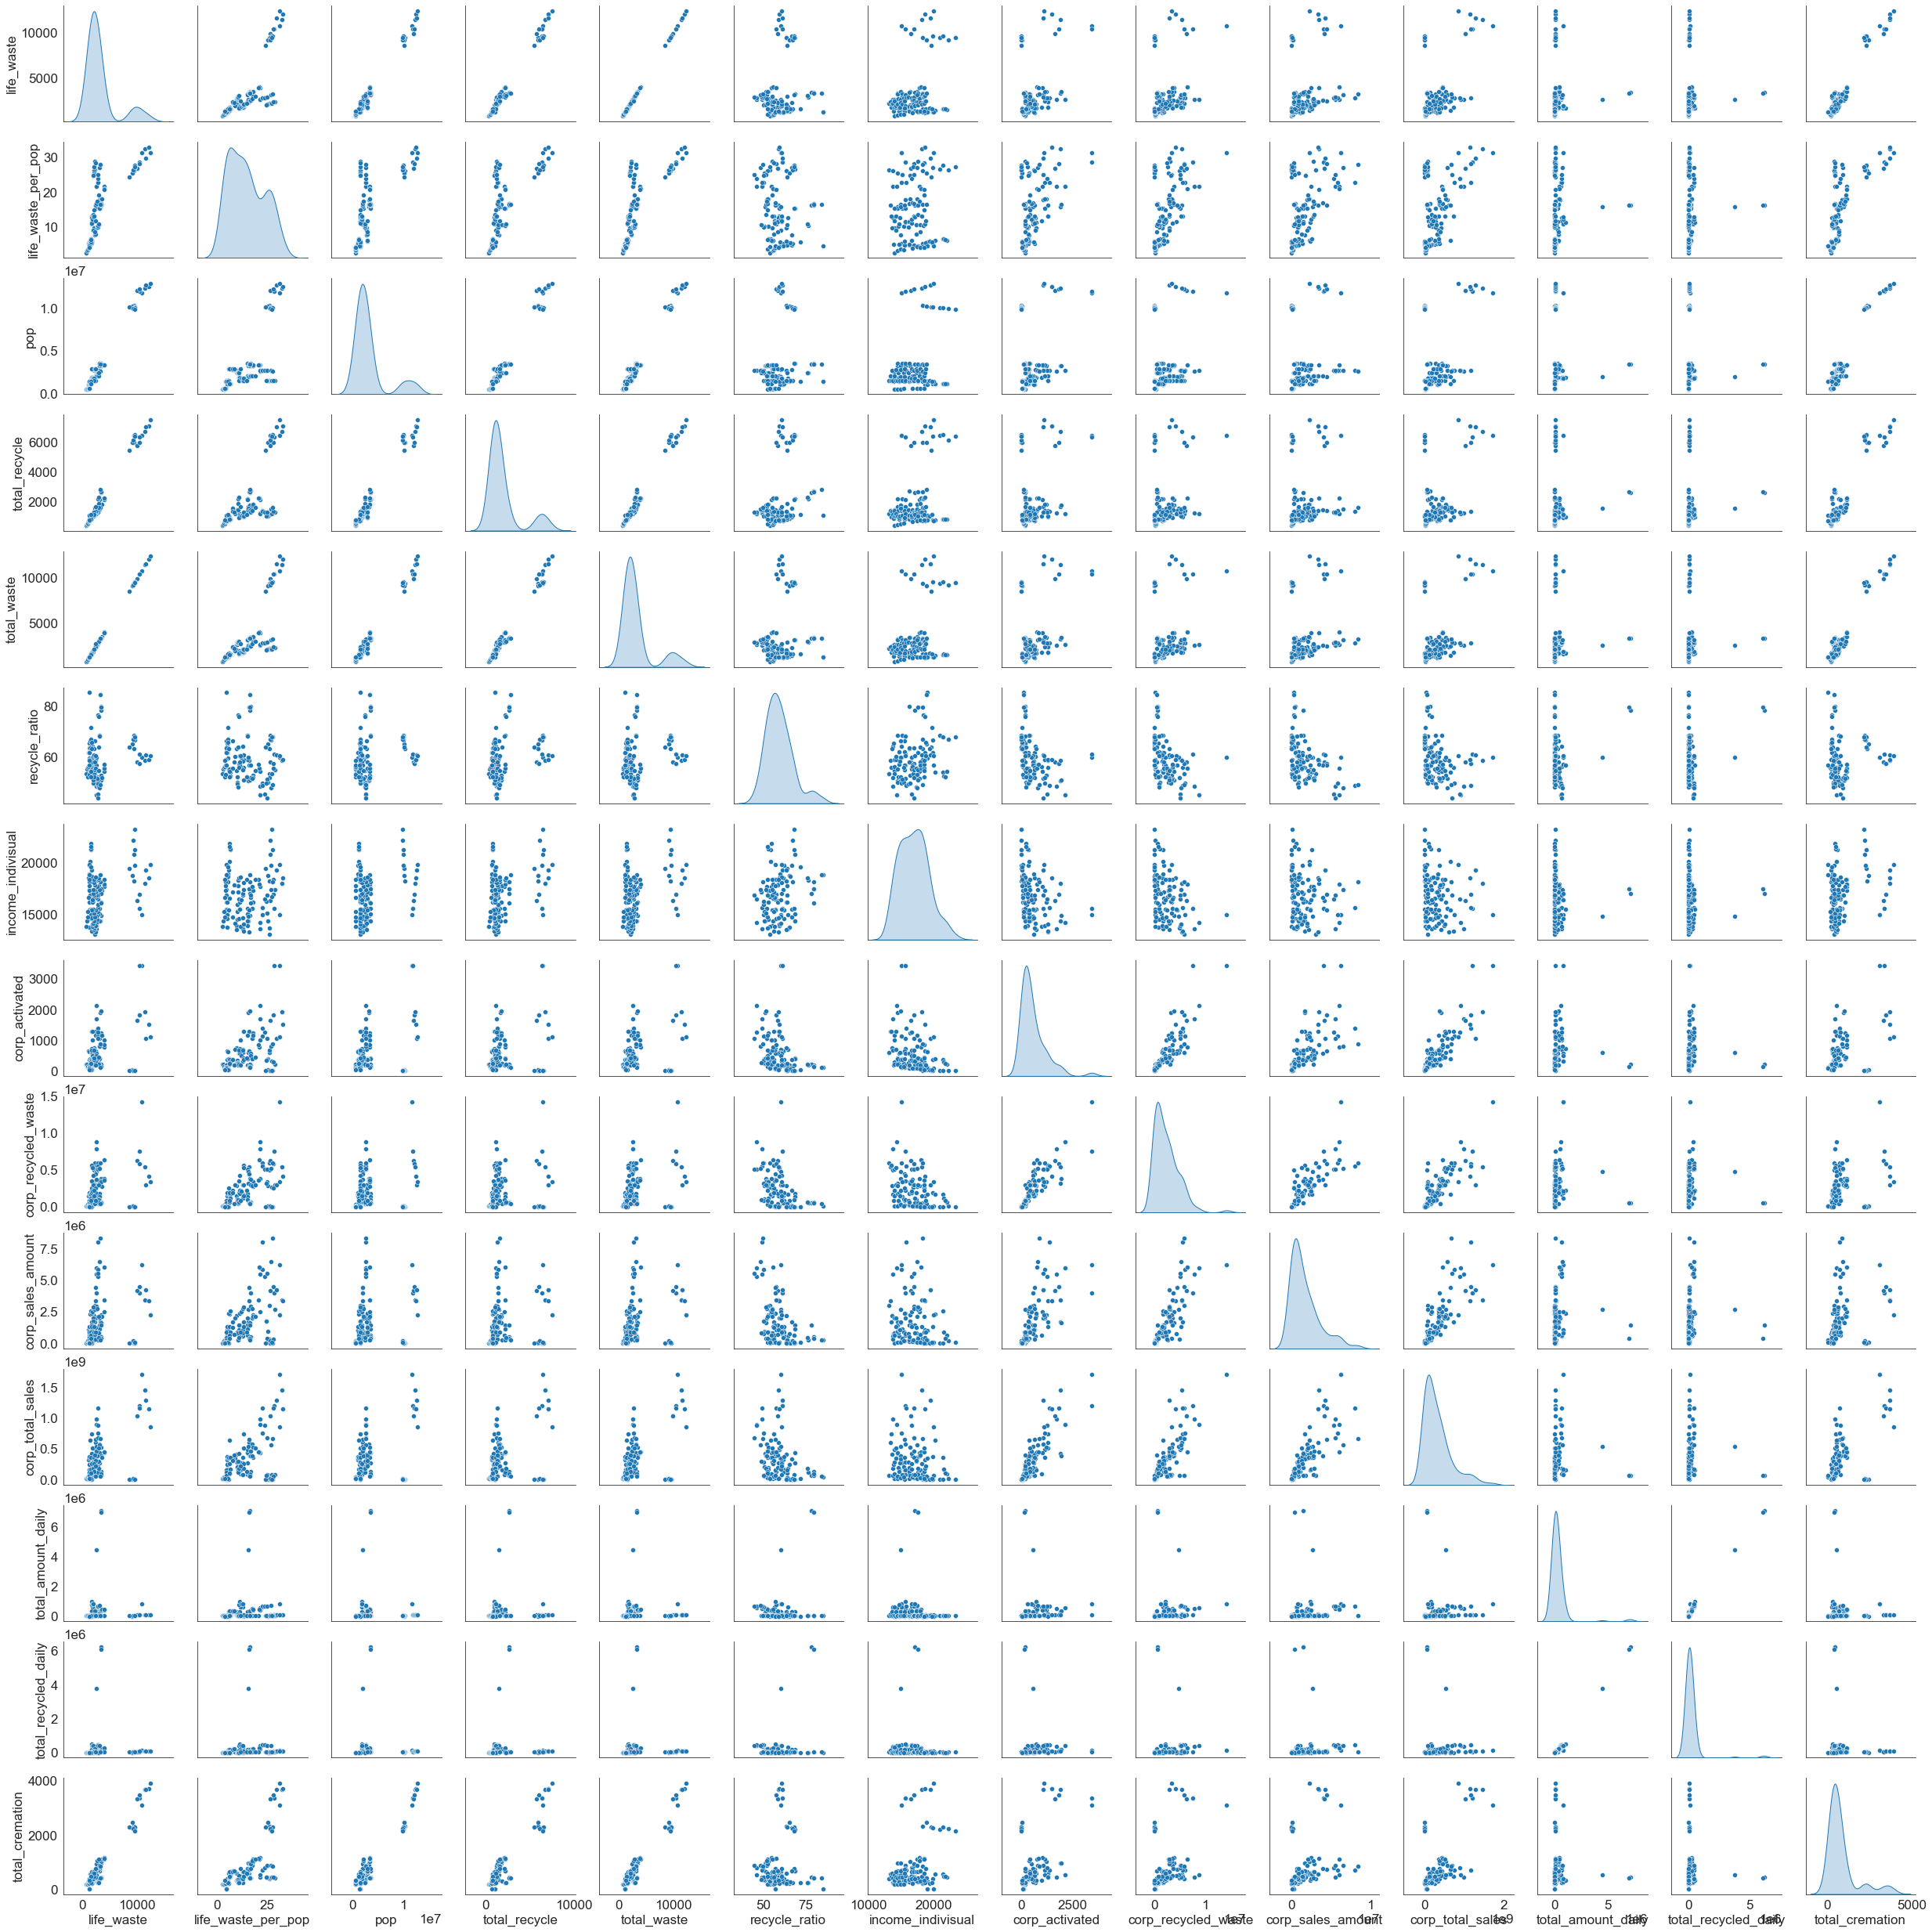

In [92]:
sns.pairplot(df[df.columns.tolist()[2:]],diag_kind="kde")

In [72]:
# 무작위 데이터 생성
np.random.seed(0)

dump = pd.DataFrame({})
for i in desc.index.tolist():
    dump = pd.concat([dump,pd.Series(np.random.normal(np.mean(df[i]),np.std(df[i]),100000))],axis=1)
    
dump.columns = desc.index.tolist()
dump

,yr,life_waste,life_waste_per_pop,pop,total_recycle,total_waste,recycle_ratio,income_indivisual,corp_activated,corp_recycled_waste,corp_sales_amount,corp_total_sales,total_amount_daily,total_recycled_daily,total_cremation
0,2018.541952,3457.585526,10.691150,5.130740e+06,2048.308132,215.323086,72.170403,14527.183296,-72.815247,2.807129e+06,4.417556e+06,4.208159e+08,-2.159914e+05,2.882900e+05,1529.030476
1,2015.416875,8120.737747,25.879747,-9.791467e+05,2592.531959,1873.620971,50.463309,19186.340262,667.799763,1.113018e+06,8.352364e+05,-1.018116e+08,-7.903223e+04,9.603087e+05,1115.311371
2,2016.742570,-1352.019876,13.724994,3.276908e+06,442.787164,550.642915,69.378168,23459.675364,-102.018828,2.446440e+06,4.291449e+06,-5.131778e+07,-3.998008e+05,7.021183e+05,624.679713
3,2019.634531,1567.092599,13.140376,4.661135e+06,1885.984486,2640.732894,70.983572,14928.762099,1314.329394,6.448901e+06,3.318002e+06,-3.199274e+08,1.332282e+05,-5.620401e+04,653.185685
4,2018.779113,-2774.067637,11.971057,1.333703e+06,-263.855488,4982.475465,56.914124,16049.996384,-109.444663,6.561388e+05,1.778970e+06,9.250031e+08,1.464745e+06,-6.337255e+05,-39.098438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2017.722043,2305.295177,1.673350,4.157983e+06,4364.234123,4105.021748,55.709144,18256.568491,2743.693357,5.708826e+06,2.180496e+06,3.701106e+08,-4.402197e+04,1.053674e+04,1634.977868
49996,2010.557674,-2520.224284,26.125823,3.441648e+06,560.667188,5150.144915,49.188975,16062.559379,654.884037,3.722130e+06,1.449985e+06,5.960729e+08,-1.088079e+06,3.624050e+04,-379.572721
49997,2013.926395,5341.581067,10.821510,5.439653e+06,1014.900228,4112.388485,52.770684,19651.870889,-202.631110,1.250016e+06,3.171032e+06,5.127324e+08,8.081776e+05,2.429934e+06,1410.231520
49998,2015.839780,-63.796362,3.468066,-2.706739e+04,777.131152,9316.566543,45.292069,16647.485815,1432.754336,9.480792e+05,3.825948e+06,8.842650e+08,2.772616e+05,1.131707e+06,1781.865481


In [73]:
# 0보다 작으면 안되는 값 0 으로 치환
dump.loc[dump['life_waste']< 0,'life_waste'] = 0
dump.loc[dump['life_waste_per_pop'] < 0,'life_waste_per_pop'] = 0
dump.loc[dump['pop'] < 0,'pop'] = 0
dump.loc[dump['total_recycle'] < 0,'total_recycle'] = 0
dump.loc[dump['total_waste'] < 0,'total_waste'] = 0
dump.loc[dump['income_indivisual'] < 0,'income_indivisual'] = 0
dump.loc[dump['corp_activated'] < 0,'corp_activated'] = 0
dump.loc[dump['corp_recycled_waste'] < 0,'corp_recycled_waste'] = 0
dump.loc[dump['corp_sales_amount'] < 0,'corp_sales_amount'] = 0
dump.loc[dump['corp_total_sales'] < 0,'corp_total_sales'] = 0
dump.loc[dump['total_amount_daily'] < 0,'total_amount_daily'] = 0
dump.loc[dump['total_recycled_daily'] < 0,'total_recycled_daily'] = 0
dump.loc[dump['total_cremation'] < 0,'total_cremation'] = 0

In [74]:
dump

,yr,life_waste,life_waste_per_pop,pop,total_recycle,total_waste,recycle_ratio,income_indivisual,corp_activated,corp_recycled_waste,corp_sales_amount,corp_total_sales,total_amount_daily,total_recycled_daily,total_cremation
0,2018.541952,3457.585526,10.691150,5.130740e+06,2048.308132,215.323086,72.170403,14527.183296,0.000000,2.807129e+06,4.417556e+06,4.208159e+08,0.000000e+00,2.882900e+05,1529.030476
1,2015.416875,8120.737747,25.879747,0.000000e+00,2592.531959,1873.620971,50.463309,19186.340262,667.799763,1.113018e+06,8.352364e+05,0.000000e+00,0.000000e+00,9.603087e+05,1115.311371
2,2016.742570,0.000000,13.724994,3.276908e+06,442.787164,550.642915,69.378168,23459.675364,0.000000,2.446440e+06,4.291449e+06,0.000000e+00,0.000000e+00,7.021183e+05,624.679713
3,2019.634531,1567.092599,13.140376,4.661135e+06,1885.984486,2640.732894,70.983572,14928.762099,1314.329394,6.448901e+06,3.318002e+06,0.000000e+00,1.332282e+05,0.000000e+00,653.185685
4,2018.779113,0.000000,11.971057,1.333703e+06,0.000000,4982.475465,56.914124,16049.996384,0.000000,6.561388e+05,1.778970e+06,9.250031e+08,1.464745e+06,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2017.722043,2305.295177,1.673350,4.157983e+06,4364.234123,4105.021748,55.709144,18256.568491,2743.693357,5.708826e+06,2.180496e+06,3.701106e+08,0.000000e+00,1.053674e+04,1634.977868
49996,2010.557674,0.000000,26.125823,3.441648e+06,560.667188,5150.144915,49.188975,16062.559379,654.884037,3.722130e+06,1.449985e+06,5.960729e+08,0.000000e+00,3.624050e+04,0.000000
49997,2013.926395,5341.581067,10.821510,5.439653e+06,1014.900228,4112.388485,52.770684,19651.870889,0.000000,1.250016e+06,3.171032e+06,5.127324e+08,8.081776e+05,2.429934e+06,1410.231520
49998,2015.839780,0.000000,3.468066,0.000000e+00,777.131152,9316.566543,45.292069,16647.485815,1432.754336,9.480792e+05,3.825948e+06,8.842650e+08,2.772616e+05,1.131707e+06,1781.865481


In [75]:
# 관계 확인
dump_corr = dump.corr()
dump_corr

,yr,life_waste,life_waste_per_pop,pop,total_recycle,total_waste,recycle_ratio,income_indivisual,corp_activated,corp_recycled_waste,corp_sales_amount,corp_total_sales,total_amount_daily,total_recycled_daily,total_cremation
yr,1.000000,-0.004600,-0.005819,-0.002042,0.004598,-0.002901,0.001680,0.007993,0.004149,-0.010048,0.004428,0.004147,-0.010772,0.004692,0.002649
life_waste,-0.004600,1.000000,0.004099,0.006892,0.006655,0.003386,0.002220,0.006869,0.004299,-0.000830,-0.011597,-0.004316,0.003978,0.004557,-0.004970
life_waste_per_pop,-0.005819,0.004099,1.000000,-0.006497,-0.006584,-0.005864,-0.002252,0.003377,0.001959,-0.002121,-0.003094,-0.002531,-0.001170,-0.002945,0.002563
pop,-0.002042,0.006892,-0.006497,1.000000,-0.002044,-0.000439,-0.001901,-0.003469,0.002799,0.003130,0.002822,0.005293,0.000338,-0.002552,-0.000713
total_recycle,0.004598,0.006655,-0.006584,-0.002044,1.000000,0.004466,0.002873,0.000638,-0.004087,0.000513,0.002798,0.000911,-0.001365,0.003646,-0.001473
total_waste,-0.002901,0.003386,-0.005864,-0.000439,0.004466,1.000000,-0.007251,-0.005239,-0.000430,-0.005805,0.008630,-0.002338,0.001359,0.007941,-0.003287
recycle_ratio,0.001680,0.002220,-0.002252,-0.001901,0.002873,-0.007251,1.000000,-0.001129,0.003492,-0.000062,0.003693,0.006239,0.002363,0.001508,0.003126
income_indivisual,0.007993,0.006869,0.003377,-0.003469,0.000638,-0.005239,-0.001129,1.000000,-0.000286,-0.004351,0.006248,-0.003782,-0.000863,0.004150,-0.004475
corp_activated,0.004149,0.004299,0.001959,0.002799,-0.004087,-0.000430,0.003492,-0.000286,1.000000,-0.002810,-0.001795,0.001150,-0.000696,-0.000254,-0.000955
corp_recycled_waste,-0.010048,-0.000830,-0.002121,0.003130,0.000513,-0.005805,-0.000062,-0.004351,-0.002810,1.000000,0.001255,-0.002375,-0.003073,0.003191,-0.003388


In [79]:
# separate data
x, x_val = dump.iloc[:80000,:],dump.iloc[80000:,:]

y = x['total_waste']
x = x.drop(axis=1,labels=['total_waste'])

y_val = x_val['total_waste']
x_val = x_val.drop(axis=1,labels=['total_waste'])

In [83]:
scaler = StandardScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.to_numpy().reshape(-1,1))

x_val = scaler.fit_transform(x_val)
y_val = scaler.fit_transform(y_val.to_numpy().reshape(-1,1))

In [ ]:
# data split from train data
X_train, y_train, X_test, y_test = train_test_split(x,y,train_size=0.8)

In [86]:
model = Sequential()

model.add()

model.compile()